# Quatitative Evaluation

Flipping the top pixels and see how much logodds drop in terms of the top-1 classification error.

In [2]:
%matplotlib inline
import torch
import os
import pandas as pd
import seaborn as sns

Take out all the files end with 'records.th'

In [3]:
def get_file_names(directory):
    directory = os.path.join('../result', directory)
    result = []
    for filename in os.listdir(directory):
        if filename.endswith("records.th"): 
            result.append(filename)
    return result

In [18]:
arr = []
identifiers = ['1013-vbd_l1_opposite-0.1']
for directory in identifiers:
    filenames = get_file_names(directory)
    arr.append(filenames)

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def plot_given_file(ax, filepath, name):
    orig_log_odds, all_log_odds, unnormalized_img, imp_vector, rodds = \
        torch.load(filepath)
    x_flip = np.array([0] + all_log_odds.keys())
    y_flip = np.array([orig_log_odds] + all_log_odds.values())

    ax.plot(x_flip, y_flip, label='{} flip'.format(name))
    
    if 'p_b' not in name:
        x = [k for k, v in rodds]
        y = np.array([v for k, v in rodds])
        ax.scatter(x, y, label='{} random'.format(name))
    return unnormalized_img

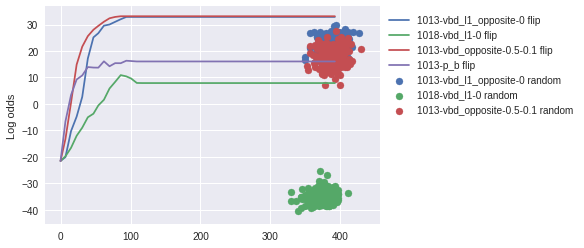

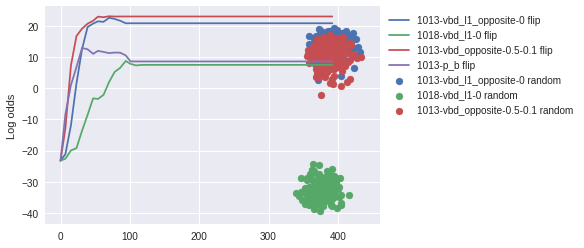

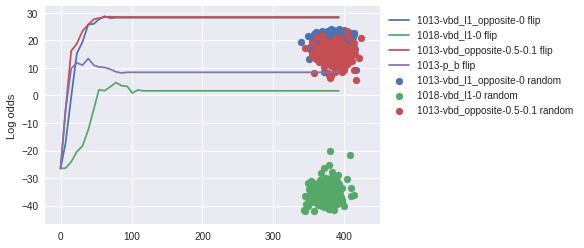

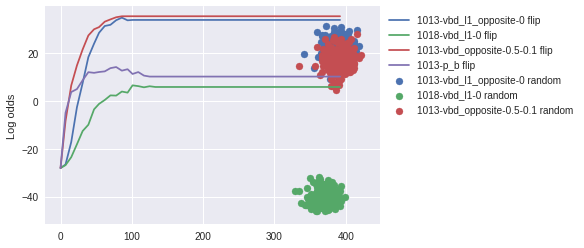

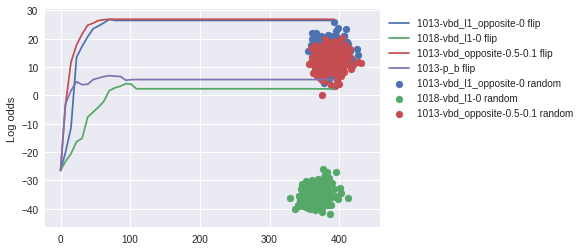

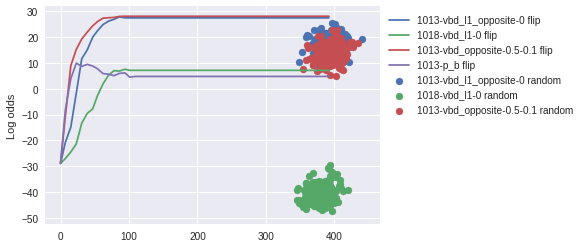

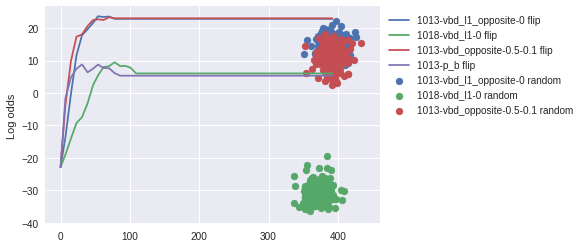

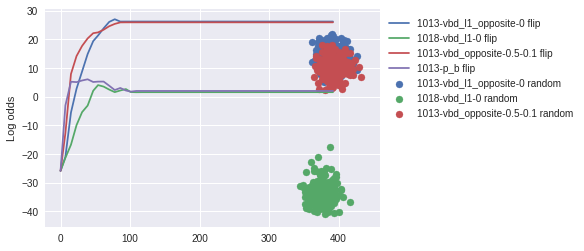

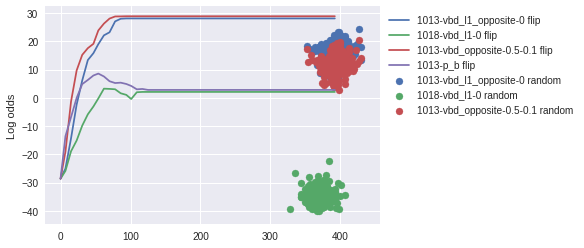

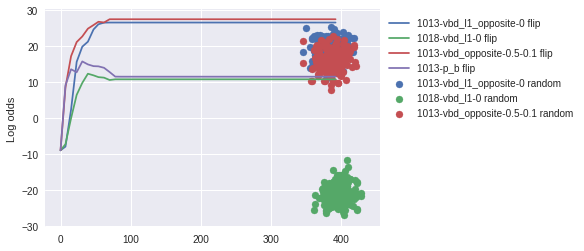

In [75]:
for idx in xrange(10):
    fig, ax = plt.subplots()
    for name in [
#         '1013-vbd_l1_opposite-0.1/8_{}_records.th'.format(idx),
#                  '1013-vbd_l1_opposite-1E-3/8_{}_records.th',.format(idx) 
#                  '1013-vbd_l1_opposite-1E-4', '1013-vbd_l1_opposite-1E-5', 
#                  '1013-vbd_l1_opposite-1E-6/8_{}_records.th',.format(idx) 
                 '1013-vbd_l1_opposite-0/8_{}_records.th'.format(idx),
                 '1018-vbd_l1-0/8_{}_records.th'.format(idx),
                 '1013-vbd_opposite-0.5-0.1/8_{}_records.th'.format(idx),
#                  '1013-vbd_opposite-0.5-1.0/8_{}_records.th'.format(idx),
                 '1013-p_b/8_3_{}_records.th'.format(idx)
    ]:
        path = '../result/{}'.format(name)
        thereal_name = name.split('/')[0]
        unnormalized_img = plot_given_file(ax, path, name=thereal_name)

#     plot_given_file(ax, '../imgs/val_benchmark/0927_ae_hole_p_b_val/{}'.format(arr[0][idx]), name='p_b')
    plt.ylabel('Log odds')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
identifiers = [ '1005-p_b',
    '1005-vbd-p0.5-0.001', '1005-vbd-p0.5-0.01', '1005-vbd-p0.5-0.1',
    '1005-vbd-p0.999-1E-4', '1005-vbd-p0.999-1E-5', '1005-vbd-p0.999-1E-6',
    '1005-vbdl1-1E-3', '1005-vbdl1-1E-4', '1005-vbdl1-1E-5',
              ]
arr = [get_file_names('../result/{}'.format(i)) for i in identifiers]

def prepare_pd_table(arr, identifiers):
    result = []
    for i in xrange(len(identifiers)):
        identifier = identifiers[i]
        
        for j in xrange(len(arr[i])):
            orig_log_odds, all_log_odds_dict, unnormalized_img, imp_vector = \
                torch.load(os.path.join('../result', '%s' % identifier, arr[i][j]))
            
            for key in all_log_odds_dict:
                log_odds_drop = orig_log_odds - all_log_odds_dict[key]
                result.append([identifier + '(n = %d)' % (len(arr[i])), j, key, log_odds_drop])
    result = pd.DataFrame(result)
    result.columns = ['method', 'img_index', 'num_flippings', 'odds_diff']
    return result

## Old

In [30]:
orig_log_odds, all_log_odds, unnormalized_img, imp_vector, rodds = \
            torch.load('../result/1007-vbd_l1_opposite-0.1/' + arr[0][0])

## Compare btw vbd, vbdf1, vbd 0.999

Notice only 20 images here

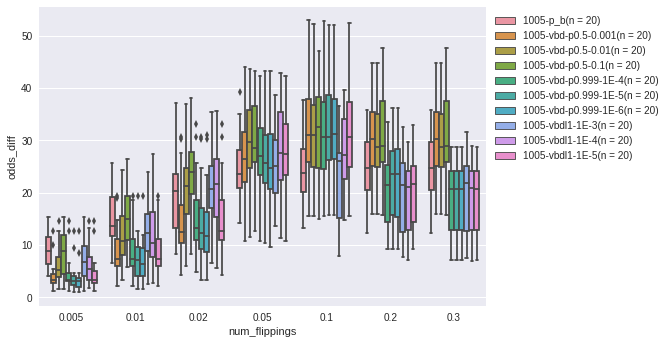

In [11]:
table = prepare_pd_table(arr, identifiers)
ax = sns.boxplot(x="num_flippings", y="odds_diff", hue="method", data=table)
ax.legend(bbox_to_anchor=(1, 1))